# 🏗️Import Necessary Libraries
---

In [1]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# 🗂️Dataset Overview
---

## Visualizing Sample Images with Corresponding Annotations

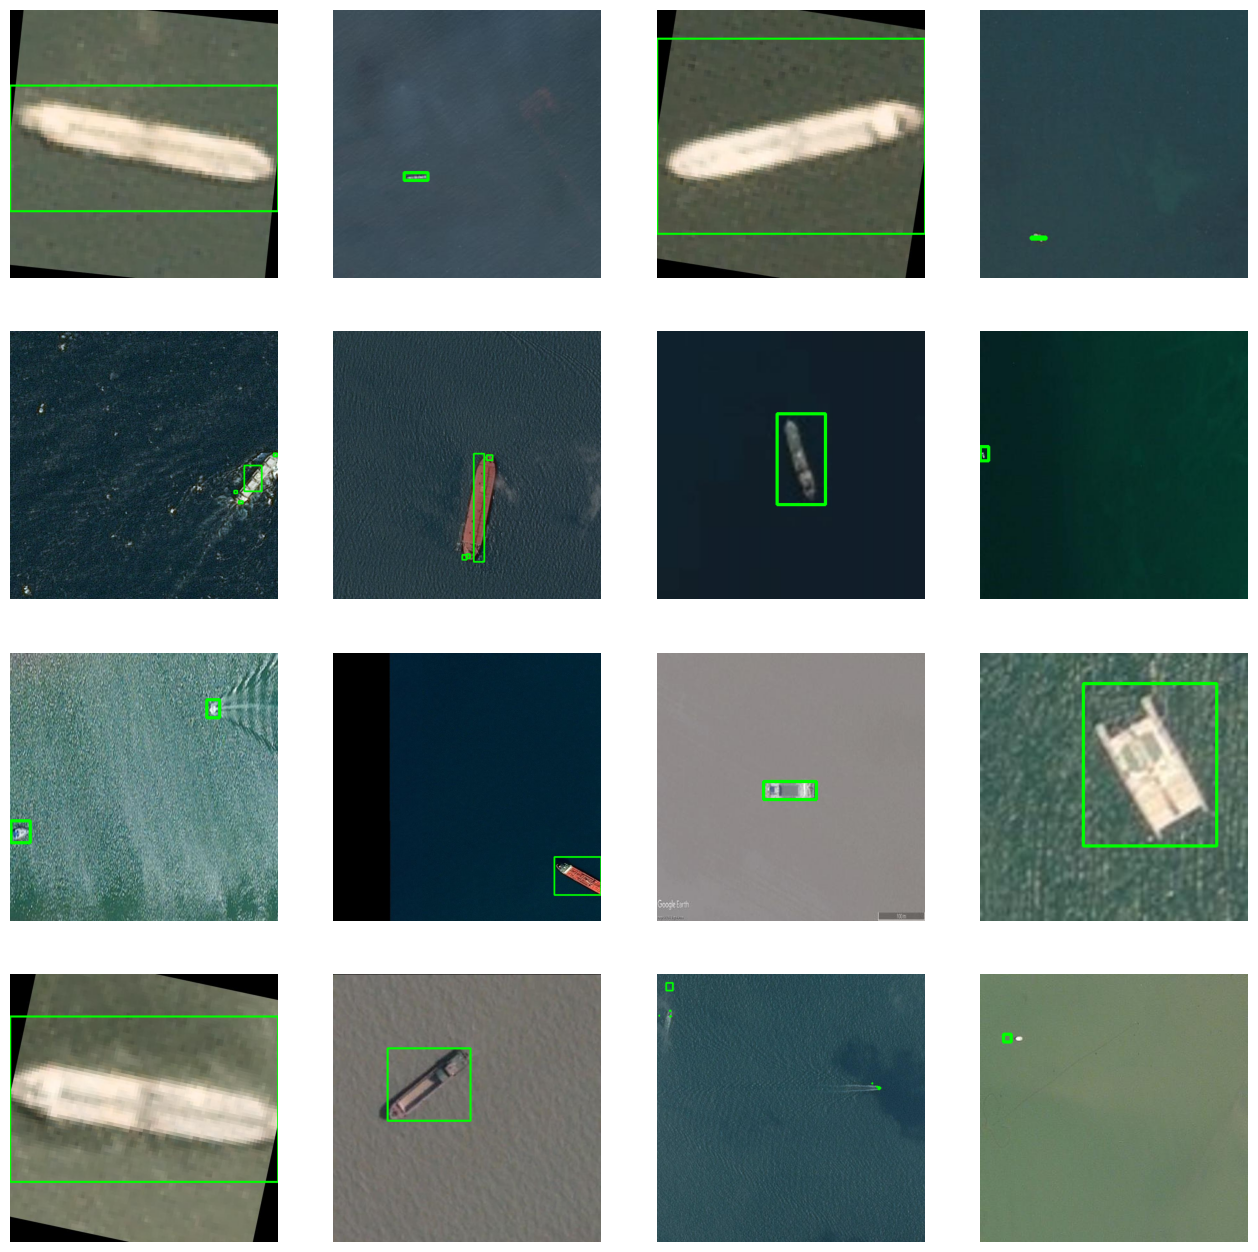

In [3]:
# Define the paths to the images and labels directories
train_images = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\train\\images"
train_labels = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\train\\labels"

test_images = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\test\\images"
test_labels = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\test\\labels"

val_images = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\valid\\images"
val_labels = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\valid\\labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## Image Metadata

In [6]:
# Load an image using OpenCV
image = cv2.imread("C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\test\\images\\0__20160905_193458_0c37__-122-34588841807276_37-756417599310865_png.rf.82197eb6853000003827a752a1c02a47.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 80x80 and 3 channels.


# 🚀Model Training
---

In [8]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data="C:/Users/RAAJIV/Downloads/Aerial Ship Dataset/ships-aerial-images/data.yaml",
            epochs=20,
            imgsz=height,
            seed=42,
            batch=8,
            workers=4)

New https://pypi.org/project/ultralytics/8.2.76 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.75  Python-3.12.4 torch-2.3.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=C:/Users/RAAJIV/Downloads/Aerial Ship Dataset/ships-aerial-images/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=80, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 22.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

train: Scanning C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\train\labels... 9697 images, 351 back


train: WARNING  C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\train\images\1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING  C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\train\images\1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
train: New cache created: C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\valid\labels... 2165 images, 68 backgro


val: New cache created: C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 96 train, 96 val
Using 0 dataloader workers
Logging results to runs\detect\train12
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.135      1.858      1.526         11         96: 100%|██████████| 1212/1212 [34:45<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720        0.3      0.153      0.104     0.0374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.054      1.728      1.474         15         96: 100%|██████████| 1212/1212 [30:59<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720      0.239     0.0645     0.0342      0.014

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.939      1.589        1.4         35         96: 100%|██████████| 1212/1212 [28:20<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.179      0.169      0.046     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.835      1.484      1.342         19         96: 100%|██████████| 1212/1212 [28:26<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.444      0.197      0.162      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.769      1.413      1.313         12         96: 100%|██████████| 1212/1212 [28:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.289      0.151     0.0816     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.725       1.35      1.294         11         96: 100%|██████████| 1212/1212 [28:43<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720     0.0991      0.124      0.028     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.665      1.315      1.264         13         96: 100%|██████████| 1212/1212 [28:47<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720      0.459      0.232      0.201     0.0991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.609      1.244      1.242         22         96: 100%|██████████| 1212/1212 [28:43<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.192      0.224     0.0715     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.599      1.214      1.242         18         96: 100%|██████████| 1212/1212 [28:43<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720     0.0852      0.115      0.046     0.0236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.561      1.172       1.22         12         96: 100%|██████████| 1212/1212 [28:41<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720      0.463       0.21      0.199     0.0926
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.528      1.133      1.175          4         96: 100%|██████████| 1212/1212 [28:36<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.427      0.242      0.204        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.479      1.071      1.159          6         96: 100%|██████████| 1212/1212 [28:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720       0.56      0.161      0.178     0.0984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.433      1.039      1.142          5         96: 100%|██████████| 1212/1212 [28:35<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.482      0.237      0.225      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.421      1.002       1.13          7         96: 100%|██████████| 1212/1212 [28:31<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.489       0.25      0.244      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.368     0.9504      1.115          8         96: 100%|██████████| 1212/1212 [28:28<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.292      0.237      0.199      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.347     0.9303      1.104          6         96: 100%|██████████| 1212/1212 [28:28<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720     0.0909      0.109     0.0307     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.333     0.9045      1.098          6         96: 100%|██████████| 1212/1212 [28:47<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.252      0.233      0.168     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G       1.29     0.8887       1.07         10         96: 100%|██████████| 1212/1212 [28:52<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.286      0.132      0.111     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.289     0.8694      1.081          9         96: 100%|██████████| 1212/1212 [28:33<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.374      0.155       0.17      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.264     0.8442      1.062          8         96: 100%|██████████| 1212/1212 [28:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:

                   all       2165       3720      0.247      0.216      0.181      0.104



20 epochs completed in 10.654 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 136.7MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics YOLOv8.2.75  Python-3.12.4 torch-2.3.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [02:


                   all       2165       3720       0.49       0.25      0.244      0.128
Speed: 0.1ms preprocess, 62.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000017844DAFAA0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# 📈Model Performance
---
<div style="background-color:#f2f2f2; padding: 20px;">
    
<h2>Train Box Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.</p>
    
<h2>Train Class Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.</p>

<h2>Train DFL Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.</p>
    
<h2>Metrics Precision (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.</p>
    
<h2>Metrics Recall (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.</p>
    
<h2>Metrics mAP50 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.</p>
    
<h2>Metrics mAP50-95 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.</p>
</div>

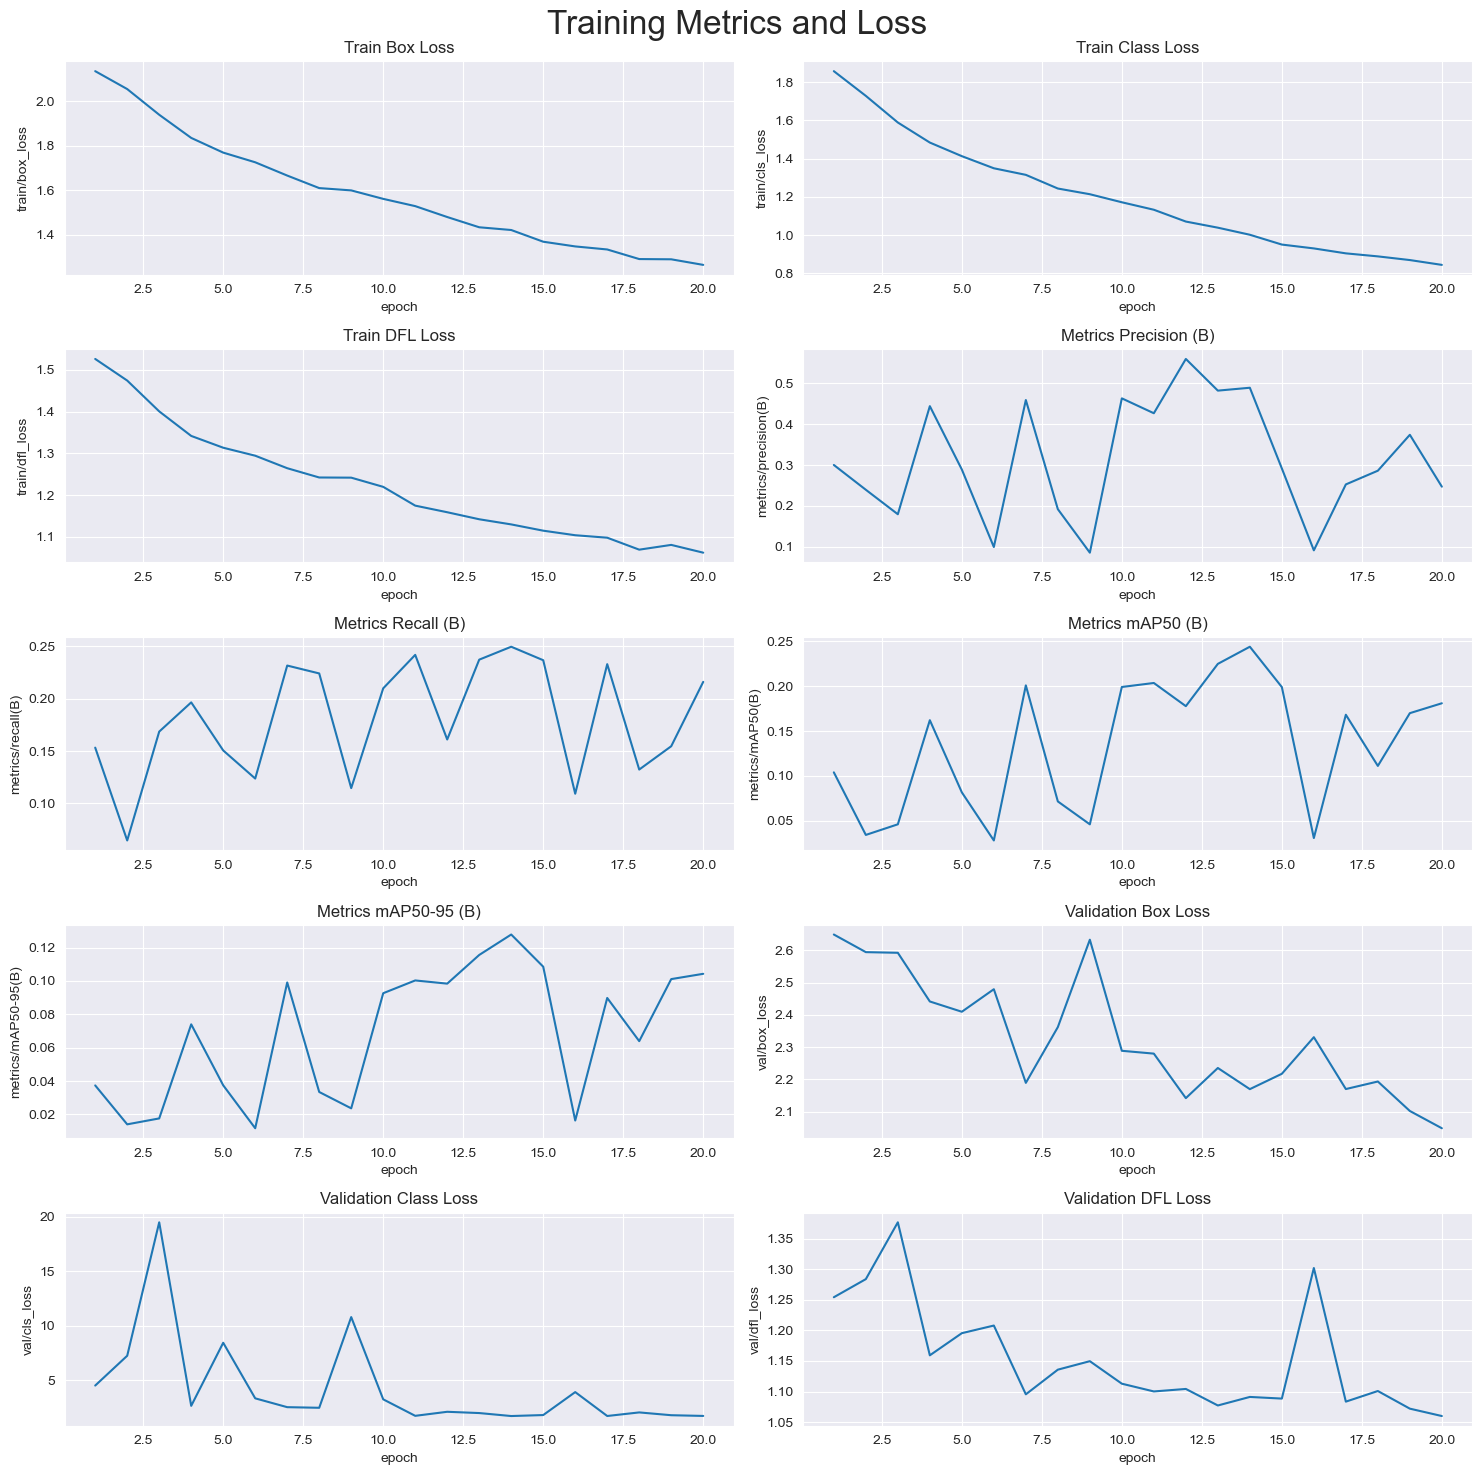

In [9]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv("C:\\Users\\RAAJIV\\Downloads\\runs\\detect\\train12\\results.csv")
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


# 📊Evaluation
---

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>mAP Metrics</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Mean Average Precision (mAP) is a popular evaluation metric in object detection, including the YOLO model. It is used to assess the accuracy of an object detection model by measuring how well it can detect objects in an image, as well as the precision of those detections. mAP takes into account both the number of correctly identified objects and the quality of the detections, which means that it is a robust metric for assessing the performance of an object detection model.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">In YOLO, mAP is particularly important because it measures the accuracy of the model in detecting objects of interest. The higher the mAP, the better the model is at identifying objects in an image. Since YOLO is an object detection model designed for real-time applications, achieving high mAP scores is crucial to ensure that the model can accurately detect objects in real-world scenarios. A high mAP score indicates that the model can effectively identify objects and can be used with confidence in real-world applications.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">However, it is worth noting that mAP is not a perfect metric and has its limitations. For example, it does not account for the difficulty of detecting certain types of objects or the importance of different object classes. Nevertheless, it remains a widely used and valuable metric for evaluating object detection models such as YOLO. With its ability to provide a reliable assessment of a model's ability to detect objects, mAP is an essential tool for both researchers and practitioners in the field of computer vision.</p>
</div>

In [10]:
%matplotlib inline
# Loading the best performing model
model = YOLO("C:\\Users\\RAAJIV\\Downloads\\runs\\detect\\train12\\weights\\best.pt")

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.75  Python-3.12.4 torch-2.3.1+cpu CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\test\labels... 1573 images, 51 backgrou


val: New cache created: C:\Users\RAAJIV\Downloads\Aerial Ship Dataset\ships-aerial-images\test\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [01:47


                   all       1573       2872      0.695      0.199      0.464      0.287
Speed: 0.1ms preprocess, 60.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val


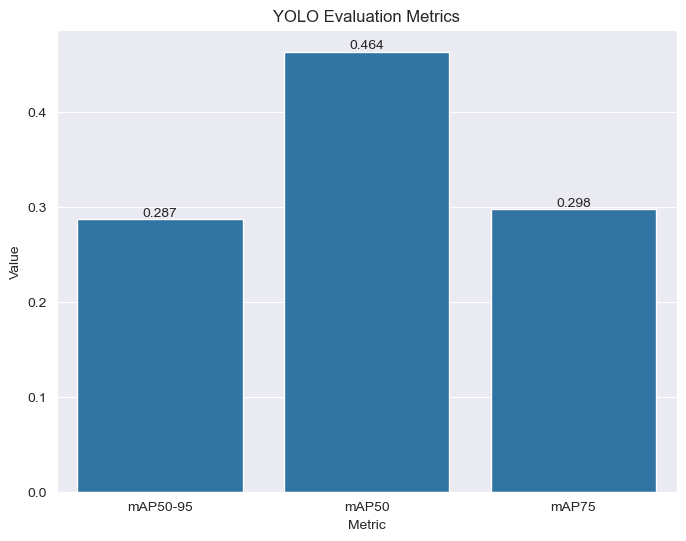

In [11]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. In object detection, the confusion matrix can be used to calculate various performance metrics like precision, recall, and F1 score. The confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. In the case of ship detection using YOLO, the confusion matrix can be used to evaluate the model's performance in detecting ships in aerial images.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The rows of the confusion matrix represent the ground truth labels (i.e., the actual presence or absence of a ship in the image), while the columns represent the predicted labels (i.e., the model's prediction of the presence or absence of a ship). The true positives (TP) represent the cases where the model correctly predicts the presence of a ship, while the true negatives (TN) represent the cases where the model correctly predicts the absence of a ship. The false positives (FP) represent the cases where the model incorrectly predicts the presence of a ship when there is none, while the false negatives (FN) represent the cases where the model incorrectly predicts the absence of a ship when there is one. By looking at these values, we can calculate various performance metrics that can help us evaluate the model's performance.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Overall, the confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. By using this tool, we can calculate various performance metrics like precision, recall, and F1 score, which can help us understand how well the model is performing in detecting ships in aerial images. This, in turn, can help us improve the model by identifying areas where it is making mistakes and tweaking the model's architecture and parameters accordingly.</p>
</div>

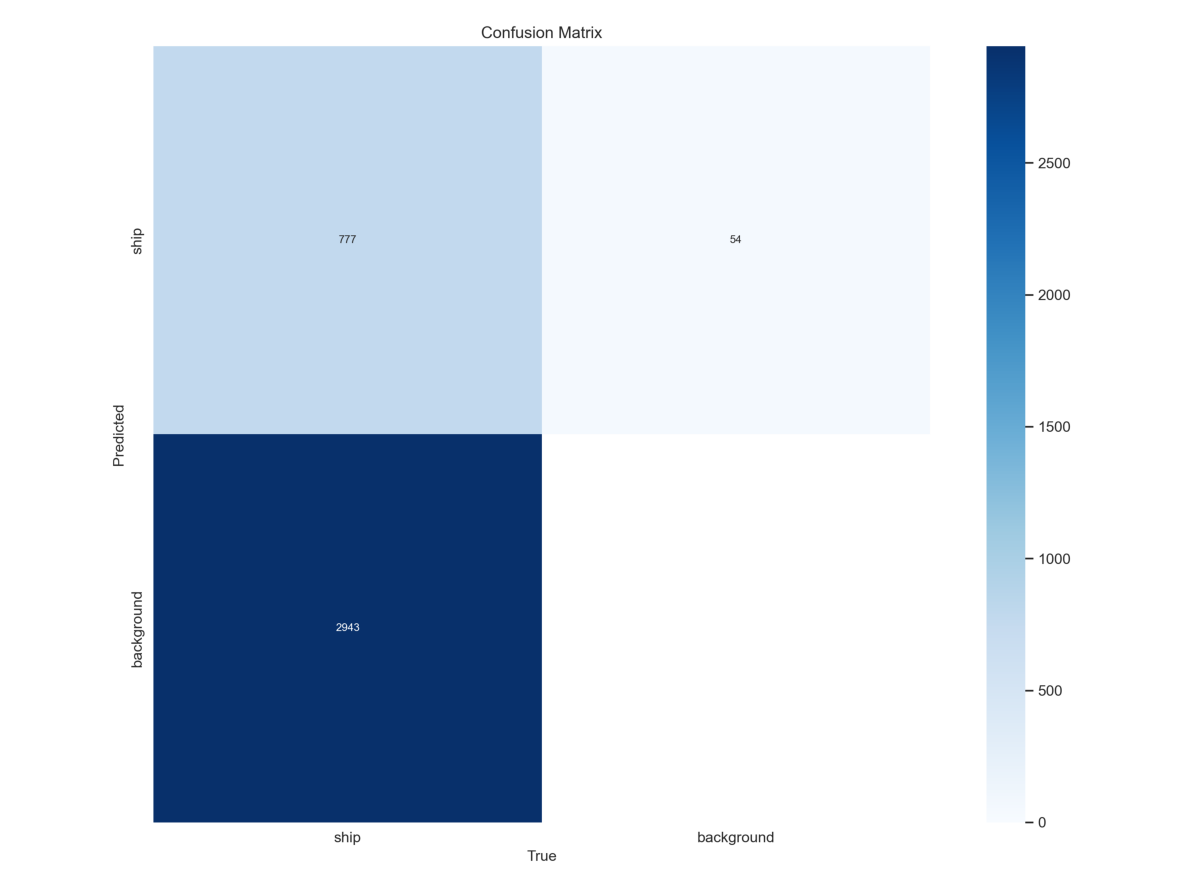

In [12]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread("C:\\Users\\RAAJIV\\Downloads\\runs\\detect\\train12\\confusion_matrix.png")

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# 🔮Making Predictions on Test Images
---

In [13]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 96x96 (no detections), 157.6ms
Speed: 1.0ms preprocess, 157.6ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 4 ships, 131.7ms
Speed: 1.0ms preprocess, 131.7ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 2 ships, 123.7ms
Speed: 1.0ms preprocess, 123.7ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 1 ship, 125.7ms
Speed: 1.0ms preprocess, 125.7ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 1 ship, 123.7ms
Speed: 1.0ms preprocess, 123.7ms inference, 2.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 118.7ms
Speed: 0.0ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 151.6ms
Speed: 1.0ms preprocess, 151.6ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 96)

0: 96x96 (no detections), 157.6ms
Speed: 1.0ms preprocess, 157.6ms inference, 1.0ms postprocess per image at shape (

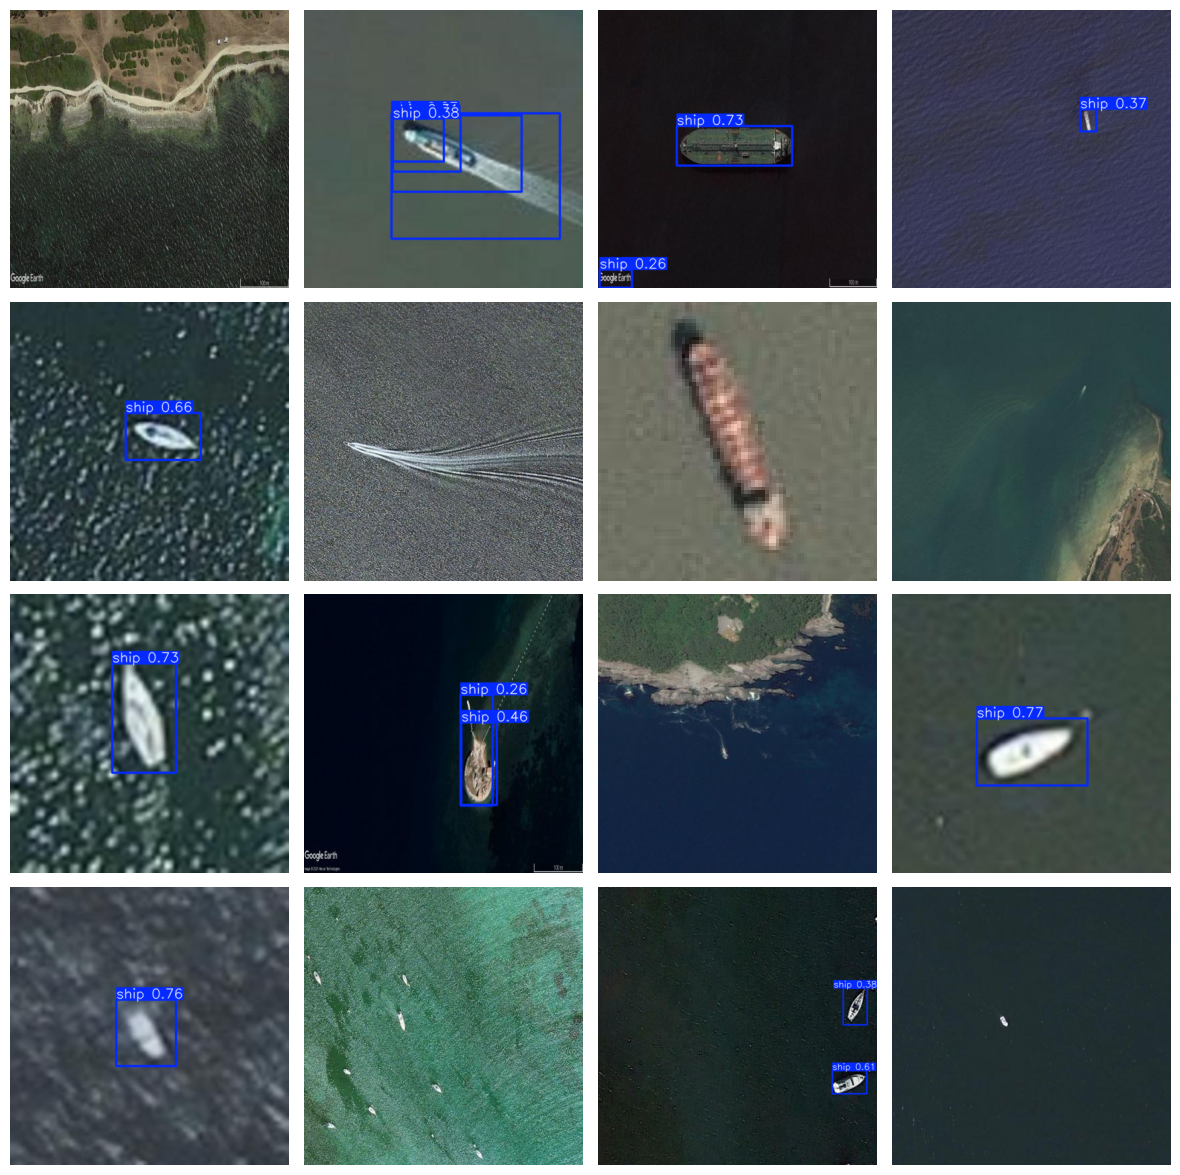

In [14]:
import random

# Define the directory where the custom images are stored
custom_image_dir = "C:\\Users\\RAAJIV\\Downloads\\Aerial Ship Dataset\\ships-aerial-images\\test\\images"

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
